In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

X = np.arange(0.0, 5.0, 0.1)
X

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

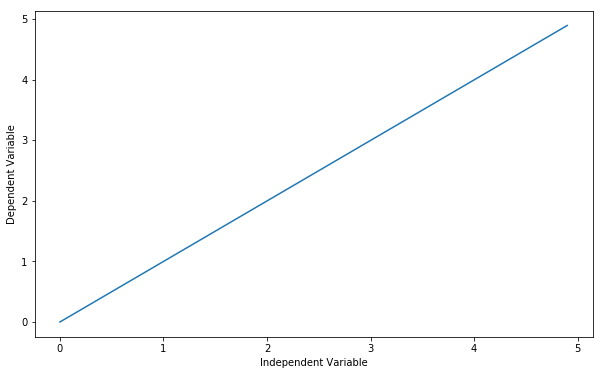

In [4]:
##You can adjust the slope and intercept to verify the changes in the graph
a=1
b=0

Y= a*X + b

plt.plot(X,Y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [7]:
x_data = np.random.rand(100).astype(np.float32)

y_data = x_data * 3 + 2
y_data = np.vectorize(lambda y: y + np.random.normal(loc=0.0, scale=0.1))(y_data)

a = tf.Variable(1.0)
b = tf.Variable(0.2)
y = a * x_data + b

loss = tf.reduce_mean(tf.square(y - y_data))

optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

train_data = []
for step in range(100):
    evals = sess.run([train,a,b])[1:]
    if step % 5 == 0:
        print(step, evals)
        train_data.append(evals)

0 [2.5426614, 2.9726224]
5 [2.489156, 2.2676194]
10 [2.6561494, 2.1803696]
15 [2.7676797, 2.1215518]
20 [2.842319, 2.0821898]
25 [2.8922696, 2.055848]
30 [2.9256976, 2.038219]
35 [2.9480686, 2.0264213]
40 [2.9630399, 2.018526]
45 [2.973059, 2.0132425]
50 [2.979764, 2.0097065]
55 [2.9842513, 2.00734]
60 [2.9872541, 2.0057564]
65 [2.9892638, 2.0046966]
70 [2.9906087, 2.0039873]
75 [2.9915087, 2.0035129]
80 [2.992111, 2.003195]
85 [2.9925141, 2.0029826]
90 [2.9927838, 2.0028403]
95 [2.9929643, 2.0027452]


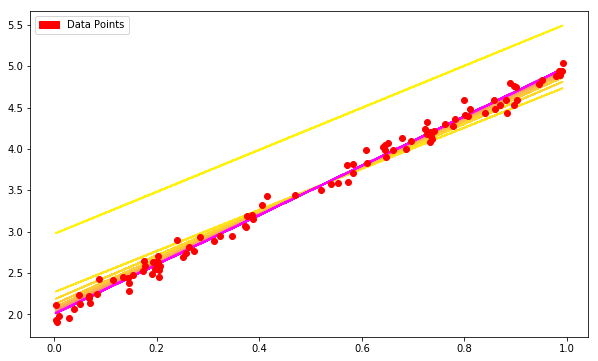

In [8]:
converter = plt.colors
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(x_data)
    line = plt.plot(x_data, f_y)
    plt.setp(line, color=(cr,cg,cb))
    
plt.plot(x_data, y_data, 'ro')

green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])

plt.show()